#Object Detection for Security and Autonomous Systems


## **Objective**  
The goal of this project is to develop an **object detection model** using **Fastai** that can accurately classify images into **11 distinct categories**. This model will be useful for **security, surveillance, and autonomous systems**, where real-time object identification is crucial for decision-making.

## **Use Cases**  
- **Security & Surveillance**: Detecting humans, vehicles, and potential threats.  
- **Autonomous Vehicles**: Identifying obstacles like cars, trucks, and pedestrians.  
- **Aviation Safety**: Recognizing aircraft and airborne hazards like birds.  

## **Categories for Detection**  
- **Human**  
- **Airplane**  
- **Automobile**  
- **Bird**  
- **Cat**  
- **Deer**  
- **Dog**  
- **Frog**  
- **Horse**  
- **Ship**  
- **Truck**  

# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32  # Batch size for training
version=2

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/My\ Drive/

In [5]:
%cd /content/drive/My Drive/DS PROJECTS/Object Detection for Security and Autonomous Systems

/content/drive/My Drive/DS PROJECTS/Object Detection for Security and Autonomous Systems


# Fetch Data

In [6]:
data_path = "data"

In [7]:
doc(DataBlock)

In [8]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y = parent_label,
                   splitter=RandomSplitter(valid_pct=0.1, seed=42),
                   item_tfms=Resize(460))

# Data Augmentation

In [9]:
doc(dblock.new)

In [10]:
dls = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                 batch_tfms=aug_transforms()).dataloaders(data_path, bs=bs)

### save the dataloaders


In [11]:
dataloader_path = "dataloaders"
if not os.path.exists(dataloader_path):
  os.mkdir(dataloader_path)
torch.save(dls, f"{dataloader_path}/category_dataloader_v_{version}.pkl")

# Load Previous DataLoader

In [ ]:
#dls = torch.load(f"{dataloader_path}/category_dataloader_v_{version-1}.pkl")

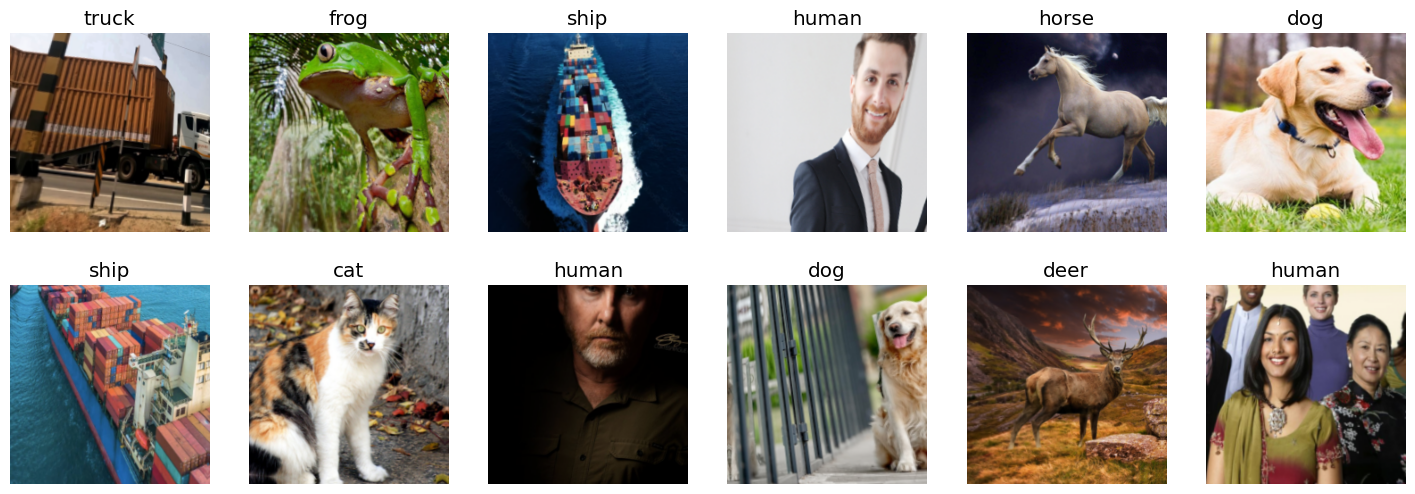

In [12]:
dls.train.show_batch(max_n=12, nrows=2)

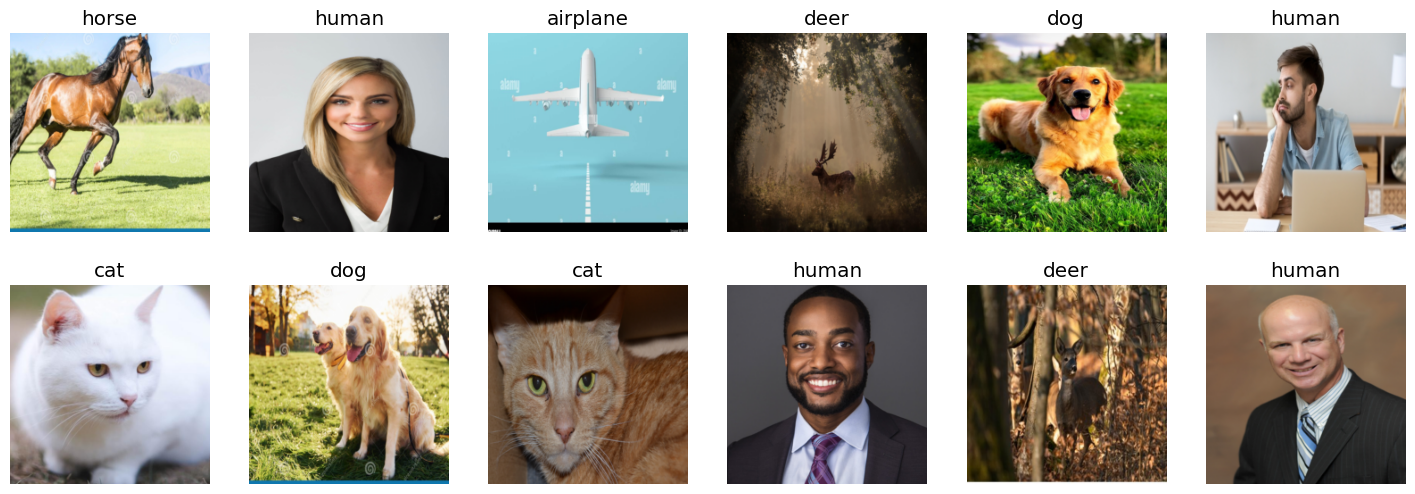

In [13]:
dls.valid.show_batch(max_n=12, nrows=2)

# Sequence of Category in `dls`

In [14]:
dls.vocab

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'human', 'ship', 'truck']

# Training and Data Cleaning

In [15]:
model_path = "models"
if not os.path.exists(model_path):
  os.mkdir(model_path)

In [16]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 116MB/s]


### Load Previous Train Model

In [ ]:
 # model=load_learner(f"category_model_v_{version-1}")

### `1st` time training

In [ ]:
# model.fine_tune(5)

### `2nd` time training

In [ ]:
# model.fine_tune(3)

### `3rd` time training

In [17]:
model.fine_tune(3)

In [18]:
doc(model.fine_tune)

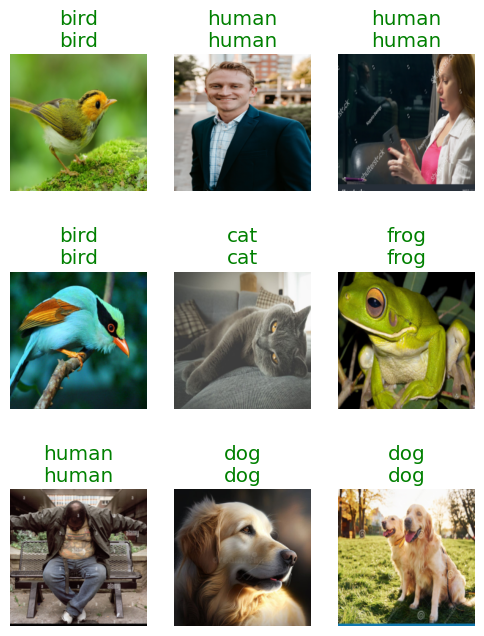

In [19]:
model.show_results(ds_idx=1, nrows=3, figsize=(6,8))

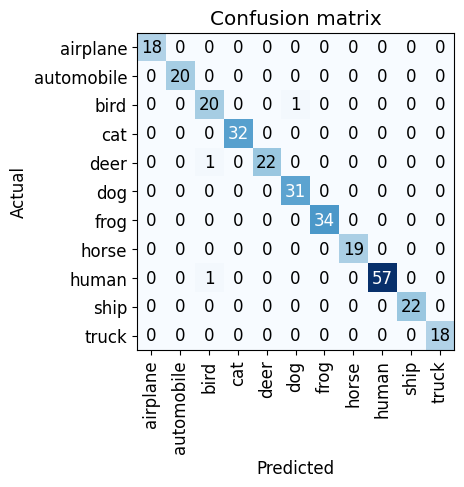

In [20]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

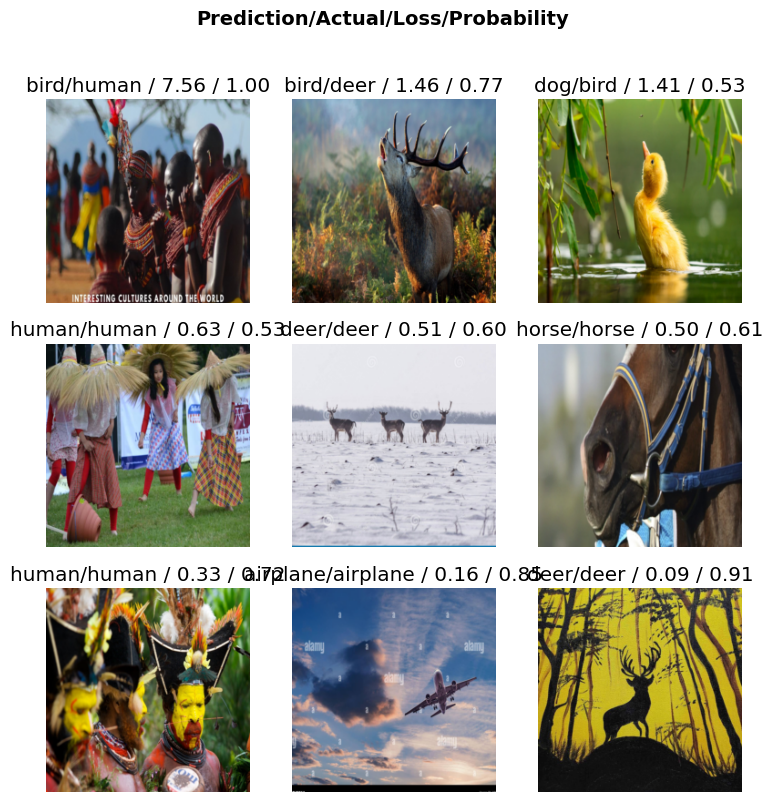

In [21]:
interp.plot_top_losses(9, nrows=3)

#### save the trained model

In [22]:
model.save(f"category_model_v_{version}")

Path('models/category_model_v_2.pth')

In [23]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,path in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{path}") # change the directory

# Export model for inference

In [24]:
model.export(f"{model_path}/category_model_v{version}.pkl")